# Enoncé
## Contexte
**Mon rôle** : civil participant à l'appel à projet

**Commanditaire** : jury de l’appel à projet (agence "Santé publique France")

**Activité de l'entreprise :** établissement public à caractère administratif français devant améliorer et protéger la santé des populations

**Projet :** applications en lien avec l'alimentation et la santé publique

**Type de Mission :** réponse d'un appel à projet

## Attendus
**But de la mission :** proposer une idée d'application en lien avec la nutrition

**Détails de la mission :** Le jeu de données Open Food Fact est disponible sur le site officiel : https://world.openfoodfacts.org/. 

Les variables sont définies à cette adresse : https://world.openfoodfacts.org/data/data-fields.txt

Les champs sont séparés en quatre sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Etapes demandées :**
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

**1) Traiter le jeu de données, en :**

- Réfléchissant à une idée d’application.
- Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
- Nettoyant les données en :
- - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
- - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
- Automatisant ces traitements pour éviter de répéter ces opérations

**/!\ Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).**

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

/!\ L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.**

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

**Script concerné :** Un notebook d’exploration comportant une *analyse univariée, multivariée, une réduction dimensionnelle*, ainsi que les *différentes questions de recherches associées* (non cleané, pour comprendre votre démarche).

In [1]:
'''
import pip

# stocké les librairies utilisés
package_names=['pandas','numpy', 'matplotlib','seaborn','sklearn']
# vérifier leur version
pip.main(['show'] + package_names) 
# dernière version Pandas : 1.3.4
# dernière version Numpy : 1.21.4
# dernière version Matplotlib : 3.5.0
# dernière version Seaborn : 0.11.2
# dernière version Scipy : 1.7.3
'''

"\nimport pip\n\n# stocké les librairies utilisés\npackage_names=['pandas','numpy', 'matplotlib','seaborn','sklearn']\n# vérifier leur version\npip.main(['show'] + package_names) \n# dernière version Pandas : 1.3.4\n# dernière version Numpy : 1.21.4\n# dernière version Matplotlib : 3.5.0\n# dernière version Seaborn : 0.11.2\n# dernière version Scipy : 1.7.3\n"

In [2]:
'''
# stocké les librairies obsolètes
package_toupdate = ['numpy', 'matplotlib','seaborn','scipy']
# les mettre à jour
pip.main(['install'] + package_toupdate + ['--upgrade --user']) 
# --upgrade to install or update existing packages

# ou plus généralement TOUT les packages installés
import pip

for i in pip.get_installed_distributions():
    pip.main(['install', i.key, '--upgrade'])'''
# ou une seule librairie
'''!pip install numpy --upgrade --user
!pip install matplotlib --upgrade --user
!pip install seaborn --upgrade --user
!pip install scipy --upgrade --user'''

'!pip install numpy --upgrade --user\n!pip install matplotlib --upgrade --user\n!pip install seaborn --upgrade --user\n!pip install scipy --upgrade --user'

In [3]:
'''
# on vérifie la mise à jour
pip.main(['show'] + package_toupdate) 
'''

"\n# on vérifie la mise à jour\npip.main(['show'] + package_toupdate) \n"

# Explications

## Le nutriscore

Même s'il est de plus en plus répandu, le nutriscore n'est pas encore obligatoire en France. Il ne s'applique pour le moment qu'à des produits emballés :
- fruits et légumes frais
- viandes crues découpées
- miel
- ...

ne sont pas concernés par le nutriscore. L'alcool à plus de 1.2% n'est pas non plus considéré dans le nutriscore. 

De plus, les plats préparés peuvent avoir 2 nutriscores :
- un pour le plat
- un pour la sauce.

## Calcul du nutriscore
D'après le site http://alimentsmag.fr/comment-est-calcule-le-nutri-score/, voici les informations utiles pour la compréhension du nutriscore. 

Le nutriscore est calculé en soustrayant :
- la note N ==> des nutriments à dévaloriser (les calories, les acides gras saturés - graisse -, les sucres simples, le sodium - sel-) &
- la note P ==> des composantes à valoriser (les fruits, légumes, légumineuses, fruits à coques, les fibres et les protéines)

Ce calcul est différent pour certaines catégories de produits :
- les fromages, 
- les matières grasses végétales ou animales et 
- les boissons

Il est adapté en fonction de leurs particularités :
- pour les fromages ==> la teneur en protéines,
- pour les matières grasses ==> la rapport Acides Gras Saturés / Lipides Totaux,
- pour les boissons ==> les sucres totaux et les fruits et légumes.

# Importations
## Librairies et paramétrages

In [4]:
# Gestion des données
import pandas as pd
import numpy as np
from collections import Counter

# Gestion des graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# KNN pour les autres variables
from sklearn.impute import KNNImputer

# Format des résultats affichés
pd.set_option('display.max_columns', None) # display.max_columns : contrôle le nombre de colonnes à imprimer (int ou None pour imprimer toutes les colonnes)
pd.set_option('max_colwidth', 50) # Vous pouvez augmenter la largeur en passant un int (ou mettre au max en passant None)
pd.set_option("max_rows", None) # Pour modifier le nombre de lignes, vous devez modifier l' option max_rows 
pd.options.display.float_format = '{:.2f}'.format # enlève le format d'affichage : nombre scientifique

# Pour afficher les graphiques dans la continuité du code, et non pas dans une fenêtre à part:
%matplotlib inline

## Importation du jeu de données

Le fichier de données étant assez lourd, je n'importe que la moitié du fichier : 1 millions de lignes. Après visualisation du jeu de données, je filtrerais sur ce dernier pour choisir les colonnes à importer de mon jeu de données.

In [5]:
df = pd.read_csv("C:/Users/bland/Downloads/fr.openfoodfacts.org.products.csv"
                 , sep="\t", nrows= 1000000, low_memory=False, encoding="utf-8") 
# création de la liste des colonnes
listCol = df.columns

# Vérification du fichier 
## Structure du jeu de données
D'abord j'affiche aléatoirement 20 lignes du fichier.

In [6]:
df.sample(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,origins_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_fr,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
701186,273760122966000250000445,http://world-fr.openfoodfacts.org/produit/2737...,kiliweb,1580730200,2020-02-03T11:43:20Z,1580730202,2020-02-03T11:43:22Z,L'incroyable mousse chocolat noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:ch,en:switzerland,Suisse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","À compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,334.00,1397.00,NaN,22.00,14.00,NaN,NaN,NaN,

Cet échantillon nous donne plusieurs indications :
- il y a à première vue pas mal de valeurs manquantes dans le jeu de données
- certaines variables comportent les mêmes valeurs, mais dans des langues différentes
- d'autres variables comportent parfois plusieurs modalités dans une seule cellule
- les variables *pnns_groups_1* et *pnns_groups_2* comportent des valeurs **unknown**, ce qui peut fausser le calcul des valeurs manquantes

En parallèle, j'affiche les dimensions du fichier.

In [7]:
print ("Le dataset compte {:,} lignes et {} variables".format(df.shape[0], df.shape[1]).replace(",", " "))

Le dataset compte 1 000 000 lignes et 187 variables


Puis, l'espace mémoire actuel

In [8]:
print("----- Espace mémoire à l'import : -----")
print(df.info(memory_usage='deep'))

----- Espace mémoire à l'import : -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 187 entries, code to carnitine_100g
dtypes: float64(125), int64(2), object(60)
memory usage: 5.3 GB
None


Et le type des variables

In [9]:
df.dtypes

code                                                      object
url                                                       object
creator                                                   object
created_t                                                  int64
created_datetime                                          object
last_modified_t                                            int64
last_modified_datetime                                    object
product_name                                              object
abbreviated_product_name                                  object
generic_name                                              object
quantity                                                  object
packaging                                                 object
packaging_tags                                            object
packaging_text                                            object
brands                                                    object
brands_tags              

Les variables dates ne sont pas au bon format : objet et int64. Certaines variables censées être au format object sont au format float64.

## Qualité des données
### Valeurs manquantes

Avant d'afficher la part des valeurs manquantes pour chaque fichier, je vais modifier les colonnes *pnns_groups_1* et *pnns_groups_2* afin de remplacer les valeurs "unknown" par NaN pour pouvoir les comptabiliser en tant que valeur manquante.

In [10]:
df.loc[df['pnns_groups_1'] == 'unknown', 'pnns_groups_1'] = np.nan
df.loc[df['pnns_groups_2'] == 'unknown', 'pnns_groups_2'] = np.nan

In [11]:
df.isna().mean()

code                                                    0.00
url                                                     0.00
creator                                                 0.00
created_t                                               0.00
created_datetime                                        0.00
last_modified_t                                         0.00
last_modified_datetime                                  0.00
product_name                                            0.03
abbreviated_product_name                                1.00
generic_name                                            0.94
quantity                                                0.80
packaging                                               0.86
packaging_tags                                          0.86
packaging_text                                          1.00
brands                                                  0.49
brands_tags                                             0.49
categories              

Il y a ici plusieurs types de données :
   - des informations catégorielles du produits (noms, marques, catégories, pays de vente, ...)
   - des informations de qualité du produit (nutriscore, nova group, ecoscore)
   - des informations de compositions du produit (nutriments, ingrédients, additives, ...)

Malheureusement, plus de la moitié de ces variables ne sont pratiquements pas remplis (1.0000 --> 100% de valeurs manquantes). Je peux aussi voir que moins de 1% des produits n'ont pas de pays qui leur sont attribués et n'ont pas de noms de produits renseignés. Ce sera des produits à supprimer. 

La catégorie du produit est une variable importante pour la suite de l'analyse. Voyons qu'elle est la part de valeurs manquantes pour ces variables et si on peut les imputer.

In [12]:
listCat = ['categories_fr', 'main_category_fr', 'pnns_groups_1', 'pnns_groups_2']
df[listCat].isna().mean()

categories_fr      0.43
main_category_fr   0.43
pnns_groups_1      0.54
pnns_groups_2      0.54
dtype: float64

On peut voir que *categories* et *main_category* sont plus renseignées que *pnns_groups_1* et *pnns_groups_2*. Regardons si les informations sont les mêmes ou si elles se complètent.

In [13]:
df[~(df['categories'].isna())
    &~(df['main_category'].isna())
    &~(df['pnns_groups_1'].isna())
    &~(df['pnns_groups_2'].isna())][['code','categories_fr','main_category_fr','pnns_groups_1','pnns_groups_2']].sample(20)

,code,categories_fr,main_category_fr,pnns_groups_1,pnns_groups_2
833902,3263851486219,"Aliments et boissons à base de végétaux,Alimen...",Pistaches décortiquées,Salty snacks,Nuts
5403,0010700066862,"Snacks,Snacks sucrés,Cacao et dérivés,Confiser...",Confiseries chocolatées,Sugary snacks,Sweets
566118,20193140,"Snacks,Snacks sucrés,Biscuits et gâteaux,Biscuits",Biscuits,Sugary snacks,Biscuits and cakes
431780,0746742290780,"Boissons,Boissons gazeuses,Sodas",Sodas,Beverages,Sweetened beverages
643785,2350299003830,"Produits laitiers,Produits fermentés,Produits ...",en:Old sheep cheese,Milk and dairy products,Cheese
189150,00687423,"Epicerie,Sauces,Sauces indiennes",Sauces indiennes,Fat and sauces,Dressings and sauces
898553,3346390000754,"Aliments et boissons à base de végétaux,Alimen...",Pommes gala,Fruits and vegetables,Fruits
626389,2279856033397,"Viandes,Charcuteries,Jambons,Jambons blancs",Jambons blancs,Fish Meat Eggs,Processed meat
596267,2124902002622,"Produits laitiers,Produits fermentés,Produits ...",en:young-gouda,Milk and dairy products,Cheese
202629,0070784023670,"Produits laitiers,Produits fermentés,Produits ...",Yaourts,Milk and dairy products,Milk and yogurt


A première vue, les données des 4 series ont l'air similaire, mais à des niveaux différents (i.e. *categories* : Snacks,Snacks sucrés,Confiseries ; *main_category* : Confiseries ; *pnns_groups_1* : Sugary snacks ; *pnns_groups_2* : Sweets). De plus, les series *categories* et *main_category* sont en français, alors que les series *pnns_groups_1* et *pnns_groups_2* sont en anglais. Regardons combien de categories sont contenues dans chacune des series.

In [14]:
for col in listCat:
    print(col)
    print("nunique = ", df[col].nunique())

categories_fr
nunique =  40207
main_category_fr
nunique =  17532
pnns_groups_1
nunique =  11
pnns_groups_2
nunique =  40


On peut voir que ce sont les series *pnns_groups_1* et *pnns_groups_2* qui ont le moins de modalité. Elles seront plus gérable pour notre analyse que plusieurs milliers de catégories distinctes. Regardons si l'on peut renseigner les valeurs manquantes de *pnns_groups_1* grâce à *categories* ou *main_category*.

In [15]:
listCat = df[(~df['categories_fr'].isnull())&(df['categories_fr'].str.upper().str.contains(r'[A-Z]+'))]['categories_fr'].str.upper().str.replace("-"," ").unique()[:20]
listMainCat = df[(~df['main_category_fr'].isnull())&(df['main_category_fr'].str.upper().str.contains(r'[A-Z]+'))]['main_category_fr'].str.upper().str.replace("-"," ").unique()[:20]

In [16]:
df_temp = df[df['categories_fr'].str.upper().str.replace("-"," ").isin(listCat)].copy()
df_temp['pnns_groups_1'] = df_temp['pnns_groups_1'].str.upper().str.replace("-"," ")
pd.crosstab(df_temp['pnns_groups_1'], df_temp['categories_fr'])

categories_fr,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains,Baguettes","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains,Pains spéciaux,Pains Bagel","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Desserts,Aliments à base de fruits et de légumes,Fruits et produits dérivés,Compotes,Compotes de poire","Aliments et boissons à base de végétaux,Boissons,Boissons à base de végétaux,Jus et nectars","Conserves,Viandes,Plats préparés,Produits à la viande,Plats préparés à la viande,Plats au bœuf,Viandes en conserve,Corned-beef","Epicerie,Condiments,Sauces,Moutardes","Plats préparés,Légumes préparés,Carottes râpées,Carottes râpées assaisonnées","Plats préparés,Légumes préparés,Entrées,Entrées froides,Macédoines de légumes","Plats préparés,en:salads,Salades composées","Produits de la mer,Poissons,Saumons,Pavés de saumon","Produits de la mer,Poissons,Saumons,Poissons fumés,Saumons fumés,Pavés de saumon,Paves-de-saumon-fume","Produits laitiers,Produits fermentés,Produits laitiers fermentés,Fromages","Produits laitiers,Produits fermentés,Produits laitiers fermentés,Fromages,Fromages de France,Abondance","Produits à tartiner,Petit-déjeuners,Produits de la ruche,Produits d'élevages,Produits à tartiner sucrés,Édulcorants,Miels,Miels de thym","Produits à tartiner,Petit-déjeuners,Produits de la ruche,Produits d'élevages,Produits à tartiner sucrés,Édulcorants,Miels,Miels-de-printemps","Produits à tartiner,Petit-déjeuners,Produits à tartiner sucrés,Confitures de lait","Tartes,Tartes sucrées,Tartes à la noix de coco","Viandes,Volailles,Poulets,Aiguillettes de poulet","Viandes,Volailles,Poulets,Cuisses de poulet"
pnns_groups_1,,,,,,,,,,,,,,,,,,,
BEVERAGES,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CEREALS AND POTATOES,292,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COMPOSITE FOODS,0,0,0,0,62,0,181,74,1045,0,0,0,0,0,0,0,0,0,0
FAT AND SAUCES,0,0,0,0,0,661,0,0,0,0,0,0,0,0,0,0,0,0,0
FISH MEAT EGGS,0,0,0,0,0,0,0,0,0,256,2,0,0,0,0,0,0,980,1446
FRUITS AND VEGETABLES,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MILK AND DAIRY PRODUCTS,0,0,0,0,0,0,0,0,0,0,0,12851,148,0,0,0,0,0,0
SUGARY SNACKS,0,0,0,0,0,0,0,0,0,0,0,0,0,64,24,135,1,0,0


In [17]:
df_temp = df[df['main_category_fr'].str.upper().str.replace("-"," ").isin(listMainCat)].copy()
df_temp['pnns_groups_1'] = df_temp['pnns_groups_1'].str.upper().str.replace("-"," ")
pd.crosstab(df_temp['pnns_groups_1'], df_temp['main_category_fr'])

main_category_fr,Abondance,Aiguillettes de poulet,Baguettes,Carottes râpées assaisonnées,Compotes de poire,Confitures de lait,Corned-beef,Cuisses de poulet,Fromages,Jus et nectars,Macédoines de légumes,Miels de thym,Miels-de-printemps,Moutardes,Pains Bagel,Paves-de-saumon-fume,Pavés de saumon,Pâtes d'amande,Salades composées,Tartes à la noix de coco
pnns_groups_1,,,,,,,,,,,,,,,,,,,,
BEVERAGES,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0
CEREALS AND POTATOES,0,1,294,0,0,0,0,0,0,0,0,0,0,0,181,0,0,0,1,0
COMPOSITE FOODS,0,2,0,208,0,0,79,0,0,0,81,0,0,0,0,0,4,0,1093,0
FAT AND SAUCES,0,0,0,0,0,0,0,0,0,0,0,0,0,663,0,0,0,0,0,0
FISH MEAT EGGS,0,1007,0,0,0,0,16,1454,0,0,0,0,0,0,0,2,286,0,0,0
FRUITS AND VEGETABLES,0,0,0,14,27,0,0,0,0,0,17,0,0,0,0,0,0,0,2,0
MILK AND DAIRY PRODUCTS,151,0,0,0,0,0,0,0,12873,0,0,0,0,0,0,0,0,0,0,0
SUGARY SNACKS,0,0,0,0,0,145,0,0,0,0,0,66,28,0,0,0,0,15,1,2


In [18]:
del listCat
del listMainCat
del df_temp

On peut voir que l'on aurait moins d'erreur à imputer les valeurs grâce à *categories_fr* qu'avec *main_category_fr*. 

Mais, regardons si cela apportera de la plus-value à notre jeu de données.

In [19]:
partComplete = df.loc[(df['pnns_groups_1'].isnull())&(~df['main_category_fr'].isnull())].shape[0]/df[df['pnns_groups_1'].isnull()].shape[0]*100
print("L'imputation par main_category_fr remplira {:.2f}% des valeurs manquantes de pnns_groups_1.".format(partComplete))
partComplete = df.loc[(df['pnns_groups_1'].isnull())&(~df['categories_fr'].isnull())].shape[0]/df[df['pnns_groups_1'].isnull()].shape[0]*100
print("L'imputation par categories_fr remplira {:.2f}% des valeurs manquantes de pnns_groups_1.".format(partComplete))
del partComplete

L'imputation par main_category_fr remplira 20.00% des valeurs manquantes de pnns_groups_1.
L'imputation par categories_fr remplira 20.00% des valeurs manquantes de pnns_groups_1.


Cela ne remplira à peine 20% des valeurs manquantes. Ce n'est pas une méthode assez puissante pour imputer la valeur de pnns_groups_1. Je vais donc supprimer les produits n'ayant pas de catégories de renseignées. 

### Doublons

Regardons d'un peu plus près le nombre de produit que l'on a en tout et vendus en France.

In [20]:
print("Nombre de lignes du fichier : {:,}".format(df.shape[0]).replace(","," "))
print("Nombre de produits distinct : {:,}".format(df['code'].nunique()).replace(","," "))
nb = df.loc[(~df['countries_fr'].isna())&(df['countries_fr'].str.contains('France',na=False)),'code'].nunique()/df['code'].nunique()*100
print("Part des produits français dans le dataset : {:.2f} %".format(nb))
del nb

Nombre de lignes du fichier : 1 000 000
Nombre de produits distinct : 999 996
Part des produits français dans le dataset : 45.04 %


En comparant le nombre de lignes et le nombre de produits distincts, on peut voir qu'il y a des doublons dans notre jeu de données.

De plus, un peu moins de la moitié du fichier concerne des produits vendus en France. Je me demande si je ne devrais pas filtrer le jeu de données uniquement sur ces produits là. Mon idée d'application ne devrait concerné dans un premier temps que la France. Par la suite, en vue d'un développement de l'application dans d'autres pays, je saurais par avance qu'il y a les données pour.

Par exemple,

In [21]:
listCountries = [] # création d'une liste vide
for ligne in df['countries_fr']: # pour chaque élément du paramètre
    if isinstance(ligne, float):
        continue
    listCountries += ligne.split(",") # on ajoute à la liste word chaque mot de l'élément en cours

pd.Series(Counter(listCountries)).sort_values(ascending = False)[:5]

France        450381
États-Unis    377041
Espagne        59194
Canada         38692
Allemagne      16522
dtype: int64

In [22]:
del listCountries

On peut voir tout d'abord que les 3 pays pour lesquels il y a le plus de produits sont, dans l'ordre, : la France, les Etats-Unis, puis l'Espagne. Ces pays pourront donc être des futurs projets d'expension de l'application.

Je vais visualiser les produits apparaissant en double.

In [23]:
print('Il y a {} produits en double.'.format(df.duplicated('code').sum()))

Il y a 4 produits en double.


In [24]:
df_doublons = df.loc[df['code'].isin(df[df.duplicated('code')]['code']),:]
df_doublons

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,origins_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_fr,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
721003,29994696,http://world-fr.openfoodfacts.org/produit/2999...,elcoco,1575281438,2019-12-02T10:10:38Z,1632816508,2021-09-28T08:08:28Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Botanas,Snacks dulces,en:Cocoa and its product...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Snacks sucrés,Cacao et dérivés,Chocolats",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,España,en:spain,Espagne,PASTA DE CACAO (2.3 %) LACTOSUERO EN POLVO (2....,"en:gluten,en:milk,en:soybeans",NaN,"en:eggs,en:gluten,en:mustard,en:nuts,en:soybeans","en:eggs,en:gluten,en:mustard,en:nuts,en:soybeans","Œufs,Gluten,Moutarde,Fruits à coque,Soja",NaN,NaN,NaN,1.00,NaN,en:e160c,E160c - Extrait de paprika,0.00,NaN,NaN,0.00,NaN,NaN,27.00,e,4.00,Sugary snacks,Chocolate products,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition

Cela à l'air d'être dû à des modifications de données des produits. Je ne comptais garder que les produits dont la date de modification est la plus récente, mais certains produits ont la même date de modification pour des données différentes. Je vais donc garder les produits dont l'index est le plus haut : il s'agit des derniers produits ajoutés donc des produits avec les données renseignées les plus récentes.

Combien de produits vendus en France cela concerne ?

In [25]:
print('Cela concerne {} sur {} produits vendus en France.'.format(df_doublons[df_doublons['countries_fr'].str.contains('France',na=False)]['code'].nunique(),df_doublons['code'].nunique()))
del df_doublons

Cela concerne 3 sur 4 produits vendus en France.


Il y a quand même des produits en double qui resteront après suppression des produits non vendus en France.

Il y a 2 colonnes de score du nutriscore. Regardons si elles ont les mêmes données.

In [26]:
df[~(df['nutriscore_score'].isnull())
   &~(df['nutrition-score-fr_100g'].isnull())
   &(df['nutriscore_score'] != df['nutrition-score-fr_100g'])].shape[0]

0

Déjà, aucune différence de résultats. Regardons côté valeurs manquantes.

In [27]:
df[['nutriscore_score', 'nutrition-score-fr_100g']].isna().mean()

nutriscore_score          0.55
nutrition-score-fr_100g   0.55
dtype: float64

Côté valeurs manquantes, il n'y a pas de grande différence. Je verrais par la suite.

### Valeurs aberrantes

In [28]:
df.describe(include = 'float')

,cities,allergens_fr,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,0.00,0.00,384145.00,0.00,490290.00,0.00,490290.00,0.00,490290.00,0.00,448100.00,444084.00,5.00,60917.00,804253.00,823559.00,907.00,820034.00,782162.00,11.00,4.00,5.00,9.00,12.00,2.00,12.00,9.00,95.00,39.00,7.00,3.00,3.00,7.00,43718.00,43713.00,1063.00,548.00,61.00,112.00,252.00,397.00,113.00,5.00,3.00,37.00,20.00,0.00,33.00,6.00,0.00,7.00,258466.00,262321.00,819453.00,804916.00,31.00,21.00,35.00,223.00,21.00,98.00,277.00,2884.00,360719.00,3567.00,3301.00,820646.00,33.00,52.00,18.00,792939.00,792938.00,7819.00,206292.00,27.00,7673.00,1361.00,941.00,213192.00,21159.00,20371.00,21620.00,13667.00,8471.00,8419.00,10417.00,587.00,4874.00,84.00,176.00,89525.00,362.00,259365.00,12251.00,257223.00,12265.00,9059.00,4002.00,3768.00,172.00,2217.00,124.00,185.00,1602.00,195.00,65.00,95.00,3486.00,283.00,6737.00,489445.00,260.00,2103.00,0.00,182.00,8728.00,448103.00,3.00,2.00,0.00,40.00,1678.00,6.00,41.00,26.00
mean,NaN,NaN,106554568389.06,NaN,2.24,NaN,0.01,NaN,0.06,NaN,9.16,3.45,55.60,109420340609171305684897283174536577024.00,110560.09,8093602144945157877378699033445400576.00,321.30,13.41,5.32,9.48,12.09,25.88,7.99,50.60,9.55,7.01,2.58,10.04,2.68,36.23,1.67,1.13,0.00,8.98,5.68,3.46,1.43,1.13,0.61,14.18,1.62,5.09,0.68,12.10,38.87,32.80,NaN,1.25,0.01,NaN,5.29,0.11,0.05,27.42,13.09,9.07,9.95,39.81,11.79,30.27,2.69,297.15,26.08,2.87,2.41,4.23,9.28,3.66,19.24,10.41,2.78,1.11,63946796265507094528.00,0.08,1.42,0.24,0.12,0.27,0.02,0.29,0.03,0.02,0.74,3.54,0.03,0.02,0.16,0.34,2.17,1.84,0.45,0.35,0.20,0.60,0.01,3.91,0.01,0.00,0.00,0.00,0.05,0.00,0.32,1.22,11.67,1.88,6.75,38.43,10.24,46.38,7.63,15.29,50.55,NaN,367.00,659.86,9.16,19.00,39.35,NaN,1.66,0.00,2.46,1.86,0.01
std,NaN,NaN,66028340609605.28,NaN,3.08,NaN,0.11,NaN,0.28,NaN,8.91,0.96,21.90

Je vois que les variables définient en float, alors qu'elles devraient être en objet, le sont car aucune valeur n'est renseignée pour ces variables.

Plusieurs choses me sautent au yeux. Tout d'abord, les colonnes de nutriments ne peuvent pas avoir des quantités minimums en négatif et des quantités maximums supérieur à 100, ce n'est pas possible : ce sont des valeurs aberrantes. 

De plus, les valeurs maximum des colonnes *energy-kcal_100g* et *energy_100g* nous indiquent la présence d'autres valeurs aberrantes. En effet, "Les graisses et l'éthanol ont la plus grande quantité d'énergie alimentaire par masse, respectivement 37 et 29 kJ/g (9 et 7 kcal/g)." donc la densité énergétique ne peut pas être supérieur à 3 700kJ/100g (ou 900kcal/100g).

Je sais maintenant que je vais devoir filtrer sur le jeu de données par colonne (suppression des colonnes pratiquement vides et en doublons) et par ligne (suppression de tous les produits qui ne sont pas vendus en France), puis modifier le type de certaines colonnes (i.e. colonnes dates), gérer les valeurs aberrantes et manquantes. 

# Nettoyage
## Filtrer le jeu de données
### Suppression des colonnes en-dessous du seuil de valeurs manquantes

Il faut impérativemet garder les 7 variables essentielles au nutriscore. Je vais donc baser mon seuil de valeur manquantes maximum sur le taux de valeur manquante le plus haut sur ses 7 variables du nutriscore. 

In [29]:
listNutriment = ['energy-kcal', 'saturated-fat', 'sugars', 'sodium', 'fruits-vegetables-nuts-estimate-from-ingredients'
                 , 'fiber', 'proteins']
listNutrimentCol = [col for col in df.columns if col.startswith(tuple(listNutriment))]
seuilNa = df.loc[:,listNutrimentCol].isna().mean().max()
print("Le seuil de valeur manquante maximum est d'environ {:.0f}%.".format(seuilNa*100))

Le seuil de valeur manquante maximum est d'environ 64%.


In [30]:
colNaNRate = df.isna().mean().sort_values(ascending=False).reset_index()
colNaNRate.columns = ['Variable','Taux_NaN']
#colNaNRate.Taux_NaN = colNaNRate.Taux_NaN
colToDelete = colNaNRate[colNaNRate.Taux_NaN > seuilNa]
print('Suppression de {} colonnes : \n {}'.format(len(colToDelete),colToDelete.Variable.to_list()))
listCol = [x for x in listCol if x not in colToDelete.Variable.to_list()]
print("Il reste {} colonnes.".format(len(listCol)))

Suppression de 139 colonnes : 
 ['no_nutriments', 'additives', 'water-hardness_100g', 'ingredients_from_palm_oil', 'chlorophyl_100g', 'ingredients_that_may_be_from_palm_oil', 'cities', 'erucic-acid_100g', 'allergens_fr', 'elaidic-acid_100g', 'glycemic-index_100g', 'myristic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'nutrition-score-uk_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'gamma-linolenic-acid_100g', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'mead-acid_100g', 'beta-glucan_100g', 'melissic-acid_100g', 'lignoceric-acid_100g', 'nervonic-acid_100g', 'capric-acid_100g', 'stearic-acid_100g', 'butyric-acid_100g', 'lauric-acid_100g', 'palmitic-acid_100g', 'nucleotides_100g', 'oleic-acid_100g', 'glucose_100g', 'maltose_100g', 'carnitine_100g', 'beta-carotene_100g', 'sucrose_100g', 'casein_100g', 'gondoic-acid_100g', 'fructose_100g', 'omega-9-fat_100g', 'behenic-acid_100g', 'choline_100g', 'inositol_100g', 'serum-proteins_100g', 'eicos

### Suppression des variables en doubles

De plus, des colonnes sont en doublons : les colonnes finissant par "_tags", "fr", "_datetime" ou encore "_t". Je ne vais garder que les colonnes finissant par _fr (ou n'ayant aucun suffixe) et _datetime, je supprime toutes les autres colonnes en doubles. 
Je vais commencer par supprimer les colonnes finissant par "tags" ou "_t".

In [31]:
def list_col_end_val(listCol, val):
    for col in listCol:
        if col.endswith(val):
            print(col," finissant par {} va être supprimée.".format(val))
            listCol = [x for x in listCol if not(x.endswith(val)) == True]
    return listCol

# suppression des colonnes finissant par "_tags"
listCol = list_col_end_val(listCol,"_tags")

# suppression des colonnes finissant par "_t"
listCol = list_col_end_val(listCol,"_t")

brands_tags  finissant par _tags va être supprimée.
categories_tags  finissant par _tags va être supprimée.
countries_tags  finissant par _tags va être supprimée.
states_tags  finissant par _tags va être supprimée.
created_t  finissant par _t va être supprimée.
last_modified_t  finissant par _t va être supprimée.


Je vais maintenant supprimé toutes les colonnes sans suffixe quand il y a une autre colonne du même nom avec le suffixe '_fr'.

In [32]:
def delete_redundant_col(listCol):
    dictCol = {}
    for col in listCol:
        if col.endswith('_fr'):
            fr = col.replace('_fr','')
            if fr in df.columns:
                print(fr, 's\'apprête à être supprimé pour ne garder que', col)
                listCol = [x for x in listCol if fr != x]
                listCol = [fr if x == col else x for x in listCol]
    return listCol

listCol = delete_redundant_col(listCol)

categories s'apprête à être supprimé pour ne garder que categories_fr
countries s'apprête à être supprimé pour ne garder que countries_fr
states s'apprête à être supprimé pour ne garder que states_fr
main_category s'apprête à être supprimé pour ne garder que main_category_fr


Dimension actuelle du jeu de données

In [33]:
print ("Le dataset compte {:,} lignes et {} variables".format(df.shape[0], len(listCol)).replace(",", " "))

Le dataset compte 1 000 000 lignes et 38 variables


Part des valeurs manquantes du jeu de données

In [34]:
df[listCol].isna().mean()

code                                                    0.00
url                                                     0.00
creator                                                 0.00
created_datetime                                        0.00
last_modified_datetime                                  0.00
product_name                                            0.03
brands                                                  0.49
categories                                              0.43
countries                                               0.00
ingredients_text                                        0.51
serving_size                                            0.61
serving_quantity                                        0.62
additives_n                                             0.51
ingredients_from_palm_oil_n                             0.51
ingredients_that_may_be_from_palm_oil_n                 0.51
nutriscore_score                                        0.55
nutriscore_grade        

Dans un premier temps, je vais garder certaines informations descriptives du produit, tel que :
- le *code* des produits qui me permet d'avoir un ID dans le dataframe, 
- la *created_datetime* et *last_modified_datetime* pour savoir quand a été créé et modifié le produit dans le jeu de données,
- le *product_name* pour connaitre le nom du produit,
- le *pnns_groups_1* et *pnns_groups_2*, afin d'avoir les différentes catégories de produit,
- l'*image_small_url* pour pouvoir afficher une petite image du produit &
- le *countries* pour savoir où dans le monde est vendu le produit.

Enfin, pour avoir des indications sur la qualité du produit, je vais garder plusieurs indicateurs :
- le *nova_group* (i.e. https://fr.openfoodfacts.org/nova) donne une vision synthétique de la qualité d'un produit au point de vue du **degré de transformation des aliments**
- le *nutrition-score-fr_100g* ainsi que *nutriscore_grade* : donne une vision synthétique de la qualité d'un produit au point de vue strictement **nutritionnel**
- les informations *energy-kcal_100g* et *energy_100g* concernant la part énergétique du produit
-  les **informations nutritionnelles**, tel que le *saturated-fat_100g* (acide gras saturé), le *fat_100g* (gras), les *carbohydrates_100g* (glucides), le *sugars_100g* (sucre), les *fiber_100g* (fibres), les *proteins_100g* (protéines), le *sodium_100g* (sodium), le *salt_100g* (sel), les *fruits-vegetables-nuts-estimate-from-ingredients_100g* (fruits, légumes et noix estimés).

In [35]:
listCol = ['code', 'created_datetime', 'last_modified_datetime', 'product_name'
           , 'pnns_groups_1', 'pnns_groups_2'
           , 'image_small_url', 'countries'
           , 'nova_group', 'nutrition-score-fr_100g', 'nutriscore_grade'
           , 'energy-kcal_100g', 'energy_100g'
           , 'saturated-fat_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g'
           , 'sodium_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

del df
df = pd.read_csv("C:/Users/bland/Downloads/fr.openfoodfacts.org.products.csv"
                 , sep="\t", low_memory=False, encoding="utf-8", usecols = listCol)
df.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,image_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,00000000000000225,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,jeunes pousses,en:france,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,2021-09-01T08:11:51Z,2021-09-01T08:14:24Z,L.casei,Spain,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,NaN,NaN,1.40,0.90,9.80,9.80,NaN,2.70,0.10,0.04,0.00,NaN
2,0000000000017,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,France,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,375.00,1569.00,7.00,3.08,70.10,15.00,NaN,7.80,1.40,0.56,NaN,NaN
3,0000000000031,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,France,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,2019-11-19T15:02:16Z,2021-06-22T19:39:25Z,Filetes de pollo empanado,Espagne,NaN,NaN,unknown,unknown,https://images.openfoodfacts.org/images/produc...,163.90,685.80,1.90,1.00,NaN,NaN,NaN,15.30,1.10,0.44,NaN,NaN


In [36]:
print ("Le jeu de données compte {:,} lignes et {} variables".format(df.shape[0], df.shape[1]).replace(",", " "))

Le jeu de données compte 2 050 488 lignes et 22 variables


Avant de filtrer sur les produits français, je vais supprimer tous les produits :
- non concernés par le nutriscore : fruits/légumes frais, viandes crues découpées, miel, ...
- ou ayant un calcul du nutriscore particulier : les fromages, les matières grasses végétales ou animales et les boissons.
- n'ayant pas de catégorie ou de nom renseigné.

In [37]:
df[['pnns_groups_1','pnns_groups_2']].drop_duplicates().sort_values('pnns_groups_1')

,pnns_groups_1,pnns_groups_2
528,Alcoholic beverages,Alcoholic beverages
28258,Beverages,Fruit nectars
3018,Beverages,Waters and flavored waters
2941,Beverages,Artificially sweetened beverages
2175,Beverages,Teas and herbal teas and coffees
66,Beverages,Sweetened beverages
1470,Beverages,Plant-based milk substitutes
118,Beverages,Fruit juices
436,Beverages,Unsweetened beverages
424,Cereals and potatoes,Legumes


In [38]:
filter1 = df['pnns_groups_2'].str.contains('Vegetables|Fruits|Meat|Cheese|Fats', na = False)
filter2 = (df['product_name'].str.contains('Miel', na = False))&(df['pnns_groups_2'].str.contains('Sweets', na = False))
filter3 = ((df['pnns_groups_1'].str.lower().str.contains('beverages', na = False))
            |(df['pnns_groups_2'].str.lower().str.contains('beverages', na = False)))
df = df[~filter1 & ~filter2 & ~filter3 & (df['pnns_groups_1'] != 'unknown') & ~(df['product_name'].isnull())]
print ("Le dataset des produits français compte {:,} lignes et {} variables".format(df.shape[0], df.shape[1]).replace(",", " "))

Le dataset des produits français compte 515 316 lignes et 22 variables


### Uniquement les produits français catégorisées

In [39]:
df['countries'] = df['countries'].str.upper()
df_france = df[(df['countries'].str.contains('FRANCE', na=False))].copy()
print ("Le dataset des produits français compte {:,} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]).replace(",", " "))

Le dataset des produits français compte 195 465 lignes et 22 variables


In [40]:
df_france.isna().mean()

code                                                    0.00
created_datetime                                        0.00
last_modified_datetime                                  0.00
product_name                                            0.00
countries                                               0.00
nutriscore_grade                                        0.11
nova_group                                              0.41
pnns_groups_1                                           0.00
pnns_groups_2                                           0.00
image_small_url                                         0.05
energy-kcal_100g                                        0.16
energy_100g                                             0.08
fat_100g                                                0.08
saturated-fat_100g                                      0.08
carbohydrates_100g                                      0.08
sugars_100g                                             0.08
fiber_100g              

Malgré les filtres appliqués, le jeu de données final est assez conséquent et les valeurs manquantes pas très élevées.

## Modification des colonnes
### Modification de type des colonnes

Je transforme les colonnes created_datetime et last_modified_datetime en format datetime64.

In [41]:
df_france['created_datetime'] = pd.to_datetime(df_france['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ')
df_france['last_modified_datetime'] = pd.to_datetime(df_france['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ')
df_france[['last_modified_datetime','created_datetime']].dtypes

last_modified_datetime    datetime64[ns]
created_datetime          datetime64[ns]
dtype: object

### Modification de colonnes
Le jeu de données concernant tous les produits vendues en France, je vais transformer la colonne countries pour supprimer la valeur France. La colonne, renommée en other_countries, contiendra NaN, si le produit n'est vendu qu'en France, et le nom d'un ou plusieurs pays, si le produit est **aussi** vendu ailleurs.

In [42]:
df_france['countries'] = df_france['countries'].str.upper()
df_france['countries'] = df_france['countries'].str.replace("FRANCE","").str.replace("EN:","")
df_france['countries'] = df_france['countries'].str.replace(",,",",").str.replace(r"^,\s*","", regex=True)
df_france['countries'] = df_france['countries'].str.replace(r", $","", regex=True).str.replace(", ",",")
df_france.loc[df_france['countries'] == "", 'countries'] = np.nan
df_france.rename(columns = {"countries" : "other_countries"}, inplace = True)
df_france['other_countries'].unique()

array([nan, 'ÉTATS-UNIS', 'BELGIQUE', ...,
       'AUSTRALIE,BELGIQUE,,JAPON,NOUVELLE-ZÉLANDE,ROYAUME-UNI,ÉTATS-UNIS',
       'AUSTRALIA,BELGIUM,JAPAN,NEW ZEALAND,UNITED KINGDOM', 'MALAYSIA'],
      dtype=object)

Les variables catégories ont des disparités dans l'écriture. Corrigons cela.

In [43]:
df_france['pnns_groups_1'] = df_france['pnns_groups_1'].str.upper().str.replace("-"," ")
df_france['pnns_groups_2'] = df_france['pnns_groups_2'].str.upper().str.replace("-"," ")

Le nom des variables fruits/légumes/fruits à coque et nutrition-score-fr_100g sont vraiment trop long. Je vais les réduire.

In [44]:
df_france.rename(columns = {'fruits-vegetables-nuts-estimate-from-ingredients_100g':'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g':'nutriscore_100g'}, inplace=True)

### Création de colonnes
Le score nova décrit le degré de transformation de l'aliment par un nombre de 1 à 4. Afin que cette donnée soit plus parlante, je vais ajouter la description de chaque score.

In [45]:
df_france['nova_desc'] = np.nan
df_france.loc[df_france['nova_group'] == 1.0, 'nova_desc'] = "Aliments non-transformés ou transformés minimalement"
df_france.loc[df_france['nova_group'] == 2.0, 'nova_desc'] = "Ingrédients culinaires transformés"
df_france.loc[df_france['nova_group'] == 3.0, 'nova_desc'] = "Aliments transformés"
df_france.loc[df_france['nova_group'] == 4.0, 'nova_desc'] = "Produits alimentaires et boissons ultra-transformés"

In [46]:
df_france['nova_desc'].unique()

array([nan, 'Produits alimentaires et boissons ultra-transformés',
       'Aliments transformés',
       'Aliments non-transformés ou transformés minimalement',
       'Ingrédients culinaires transformés'], dtype=object)

In [47]:
print ("Le dataset des produits français compte {:,} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]).replace(",", " "))

Le dataset des produits français compte 195 465 lignes et 23 variables


## Gestion de la qualité des données

### Gestion des valeurs aberrantes
Je vais supprimer :
- toutes les valeurs nutritionnelles supérieures à 100g
- toutes les valeurs de *sodium_100g* supérieur à *salt_100g* (puisque le sodium est une partie du sel)
- toutes les valeurs de *saturated-fat_100g* supérieur à *fat_100g* (puisque Matières grasses dont Acide gras saturé)
- toutes les valeurs de *sugars_100g* supérieur à *carbohydrates_100g* (puisque Glucides dont Sucres)
- toutes les valeurs de *energy-kcal_100g* supérieur à 900kcal et de *energy_100g* supérieur à 3 700 kJ

In [48]:
listeColNutriment = [x for x in df_france.columns.tolist() if (x.endswith('_100g')) & (not(x.startswith('nutri')) == True) & (not(x.startswith('energy')) == True)]
listeColNutriment

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts_100g']

In [49]:
# toutes les valeurs nutritionnelles supérieures à 100g
for col in listeColNutriment:
    df_france.loc[(df_france[col] > 100.0)|(df_france[col] < 0), col] = np.nan

# toutes les valeurs de sodium_100g supérieur à salt_100g
df_france.loc[df_france['sodium_100g'] > df_france['salt_100g'], 'sodium_100g'] = np.nan

# toutes les valeurs de saturated-fat_100g supérieur à fat_100g
df_france.loc[df_france['saturated-fat_100g'] > df_france['fat_100g'], 'saturated-fat_100g'] = np.nan

# toutes les valeurs de sugars_100g supérieur à carbohydrates_100g
df_france.loc[df_france['sugars_100g'] > df_france['carbohydrates_100g'], 'sugars_100g'] = np.nan

# toutes les valeurs de energy-kcal_100g supérieur à 900kcal et de energy_100g supérieur à 3 700 kJ
df_france.loc[df_france['energy-kcal_100g'] > 900.0, 'energy-kcal_100g'] = np.nan
df_france.loc[df_france['energy_100g'] > 3700.0, 'energy_100g'] = np.nan

In [50]:
df_france.describe()

,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutriscore_100g
count,116183.00,164408.00,180027.00,179913.00,179265.00,179814.00,179627.00,73623.00,180390.00,178075.00,178069.00,123268.00,173045.00
mean,3.52,299.87,1243.18,14.82,5.36,31.49,15.09,3.20,8.56,1.09,0.44,9.46,10.26
std,0.86,166.78,693.58,15.33,6.75,27.46,19.95,4.36,7.30,2.04,0.82,20.38,8.93
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-14.00
25%,3.00,156.00,640.00,2.70,0.60,4.70,1.00,0.60,3.40,0.10,0.04,0.00,2.00
50%,4.00,287.00,1184.00,9.90,2.60,25.00,4.00,2.00,6.80,0.69,0.28,0.00,11.00
75%,4.00,427.00,1775.00,23.00,7.90,56.00,25.60,4.00,11.90,1.30,0.52,8.00,17.00
max,4.00,900.00,3700.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,43.07,100.00,40.00


In [51]:
# toutes les produits dont la somme des nutriments > 100g
df_prod_error = df_france[df_france.loc[:,listeColNutriment].sum(axis=1) > 100.0]['code']
df_prod_null = df_france[df_france.loc[:,listeColNutriment].isnull().all(axis=1)]['code']
df_prod_incorrect = df_france[(df_france['code'].isin(df_prod_error))|(df_france['code'].isin(df_prod_null))]['code']
del df_prod_error
del df_prod_null
partProduitIncorrect = ((df_prod_incorrect.shape[0])/len(df_france))*100
print(int(partProduitIncorrect)
      ,"% de notre jeu de données français comportait des produits dont les valeurs nutritionnelles étaient incorrectes, soit "
      , df_prod_incorrect.shape[0]
     , "lignes.")
del partProduitIncorrect

37 % de notre jeu de données français comportait des produits dont les valeurs nutritionnelles étaient incorrectes, soit  73437 lignes.


Je vais donc supprimer ces lignes.

In [52]:
df_france = df_france[df_france.loc[:,listeColNutriment].notnull().any(axis=1)]
df_france = df_france[df_france.loc[:,listeColNutriment].sum(axis=1) <= 100.0]

In [53]:
print ("Le dataset compte {:,} lignes et {} variables".format(df_france.shape[0], df_france.shape[1]).replace(",", " "))

Le dataset compte 122 028 lignes et 23 variables


Après tout ses filtres, je dois réindexer le jeu de données.

In [54]:
df_france = df_france.reset_index(drop=True) 

### Doublons
Vérifions si les doublons sont toujours là...

In [55]:
print("Nombre de lignes du fichier : {:,}".format(df_france.shape[0]).replace(","," "))
print("Nombre de produits distinct : {:,}".format(df_france['code'].nunique()).replace(","," "))

Nombre de lignes du fichier : 122 028
Nombre de produits distinct : 122 026


Oui il y en a, je vais donc la ligne dont l'index est le plus haut.

In [56]:
listASup = df_france[df_france.duplicated('code',keep='last')].index
df_france = df_france.drop(listASup)
del listASup

In [57]:
print("Nombre de lignes du fichier : {:,}".format(df_france.shape[0]).replace(","," "))
print("Nombre de produits distinct : {:,}".format(df_france['code'].nunique()).replace(","," "))

Nombre de lignes du fichier : 122 026
Nombre de produits distinct : 122 026


Plus de doublons.

### Gestion des valeurs manquantes

Je vais combler les valeurs manquantes des variables catégorielles *nova_desc* et *other_countries* par la création d'une autre catégorie. Du côté des variables numériques, je vais combler les valeurs manquantes des calories par conversion de la colonne la mieux rempli vers l'autre et des nutriments par 0.

#### Imputation des variables catégorielles : création d'un autre groupe

In [58]:
df_france.loc[df_france['nova_desc'].isna(),'nova_desc'] = 'Inconnu'
df_france.loc[df_france['nova_group'].isna(),'nova_group'] = 0
df_france.loc[df_france['other_countries'].isna(),'other_countries'] = 'Aucun'
df_france.isna().mean()

code                          0.00
created_datetime              0.00
last_modified_datetime        0.00
product_name                  0.00
other_countries               0.00
nutriscore_grade              0.09
nova_group                    0.00
pnns_groups_1                 0.00
pnns_groups_2                 0.00
image_small_url               0.05
energy-kcal_100g              0.14
energy_100g                   0.05
fat_100g                      0.05
saturated-fat_100g            0.05
carbohydrates_100g            0.05
sugars_100g                   0.05
fiber_100g                    0.64
proteins_100g                 0.05
salt_100g                     0.06
sodium_100g                   0.06
fruits-vegetables-nuts_100g   0.36
nutriscore_100g               0.09
nova_desc                     0.00
dtype: float64

#### Imputation des variables numériques
##### grâce à une autre variable

1 kcal = 4.1868 kJ

J'observe graphiquement les distributions avant et après imputation.

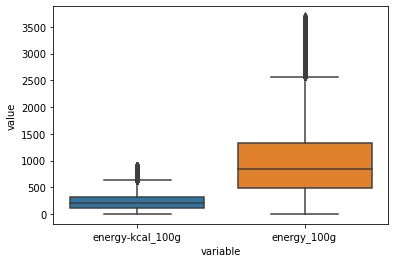

In [59]:
sns.boxplot(x="variable", y="value", data = pd.melt(df_france[['energy-kcal_100g','energy_100g']]))
plt.show();

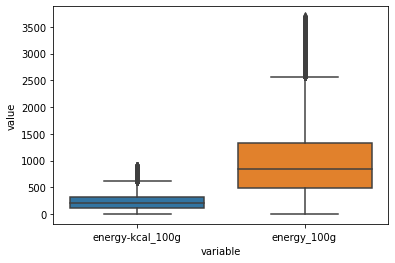

In [60]:
if df_france['energy-kcal_100g'].isna().mean() > df_france['energy_100g'].isna().mean():
    df_france.loc[df_france['energy-kcal_100g'].isna(),'energy-kcal_100g'] = df_france['energy_100g'] / 4.1868
elif df_france['energy_100g'].isna().mean() > df_france['energy-kcal_100g'].isna().mean():
    df_france.loc[df_france['energy_100g'].isna(),'energy_100g'] = df_france['energy-kcal_100g'] * 4.1868
elif df_france['energy-kcal_100g'].isna().mean() == df_france['energy_100g'].isna().mean():
    df_france.loc[df_france['energy-kcal_100g'].isna(),'energy-kcal_100g'] = df_france['energy_100g'] / 4.1868
    df_france.loc[df_france['energy_100g'].isna(),'energy_100g'] = df_france['energy-kcal_100g'] * 4.1868

sns.boxplot(x="variable", y="value", data = pd.melt(df_france[['energy-kcal_100g','energy_100g']]))
plt.show();

Les variables ont toujours la même distribution après imputation, aucune erreur.

##### grâce aux autres valeurs renseignées

Pour l'imputation de valeur numérique, je dois d'abord regarder s'il s'agit de distribution qui suivent une loi normal. En fonction, du résultat je pourrais savoir si je peux imputer les valeurs manquantes par la moyenne de la variable.

In [61]:
listeColNutriment = [x for x in df_france.columns.tolist() if (x.endswith('_100g')) & (not(x.startswith('nutri')) == True)]
df_france[listeColNutriment].skew()

energy-kcal_100g              0.89
energy_100g                   0.87
fat_100g                      2.01
saturated-fat_100g            2.21
carbohydrates_100g            1.38
sugars_100g                   2.95
fiber_100g                    6.35
proteins_100g                 1.30
salt_100g                     5.97
sodium_100g                   5.97
fruits-vegetables-nuts_100g   3.22
dtype: float64

Aucune distribution ne suit une loi normale (aucun résultat = 0), je ne peux donc pas imputer les valeurs manquantes par la moyenne. Je dois imputer les valeurs manquantes par l'algorithme k-NN ou par la médiane. Pour faire mon choix, je vais regarder la part des valeurs manquantes des variables.

In [62]:
df_france[listeColNutriment].isna().mean()

energy-kcal_100g              0.05
energy_100g                   0.05
fat_100g                      0.05
saturated-fat_100g            0.05
carbohydrates_100g            0.05
sugars_100g                   0.05
fiber_100g                    0.64
proteins_100g                 0.05
salt_100g                     0.06
sodium_100g                   0.06
fruits-vegetables-nuts_100g   0.36
dtype: float64

Je vais donc imputer les valeurs manquantes de *fiber_100g* et *fruits-vegetables-nuts_100g* par la médiane de la sous-catégorie du produit.

Pour toutes les autres variables, elles sont assez bien renseignées pour que j'utilise l'algorithme des k-NN.

###### médiane

Avant d'imputer les valeurs manquantes, j'affiche graphiquement les distributions actuelles. Après imputation des valeurs manquantes, j'afficherais à nouveau graphiquement les distributions afin de comparer les 2 graphiques et de vérifier que rien n'a drastiquement changé.

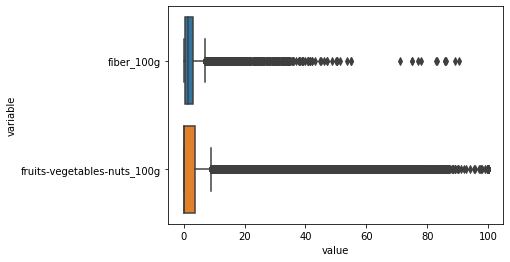

In [63]:
listImputMedian = ['fiber_100g','fruits-vegetables-nuts_100g']
sns.boxplot(x="value", y="variable", data = pd.melt(df_france[listImputMedian]), orient ='h')
plt.show();

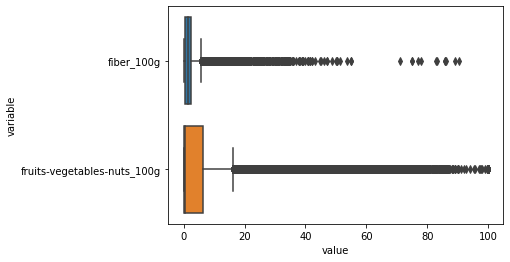

In [64]:
listImputMedian = ['fiber_100g','fruits-vegetables-nuts_100g']
for col in listImputMedian:
    for cat in df_france['pnns_groups_2'].unique():
        df_france.loc[(df_france[col].isna())&(df_france['pnns_groups_2'] == cat), col] = df_france[df_france['pnns_groups_2'] == cat][col].mean()

sns.boxplot(x="value", y="variable", data = pd.melt(df_france[listImputMedian]), orient ='h')
plt.show();

###### par l'algorithme k-NN

Je vais maintenant imputer les valeurs manquantes des variables restantes grâce aux valeurs des k voisins les plus proches (k-NN).

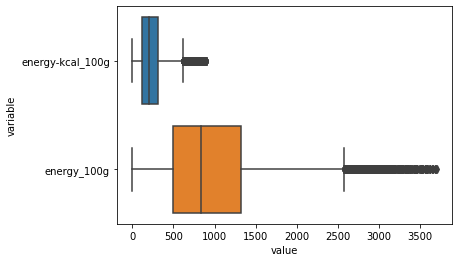

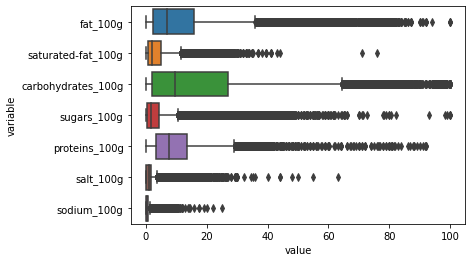

In [65]:
listkNN = [x for x in listeColNutriment if x not in listImputMedian]

list1 = [x for x in listkNN if x.startswith("energy")]
sns.boxplot(x="value", y="variable", data = pd.melt(df_france[list1]), orient ='h')
plt.show();

list2 = [x for x in listkNN if x not in list1]
sns.boxplot(x="value", y="variable", data = pd.melt(df_france[list2]), orient ='h')
plt.show();

Je vais chercher la valeur k optimal en testant l'algorithme sur des données déjà renseignée. Pour cela, je récupère toutes les lignes n'ayant aucune valeur manquante sur les nutriments de kNN, j'affecte NaN à 25% des valeurs de chaque colonne. Je récupère 25% de ce jeu de données.

In [66]:
df_kNN = df_france[~df_france.loc[:,listkNN].isnull().any(axis=1)]
i = 0
df_cleaned = df_kNN[listkNN].copy()
for col in listkNN:
    i+=1
    indexNa = df_cleaned[listkNN].sample(frac=0.25, random_state=i).index
    df_cleaned.loc[indexNa,col] = np.nan
    del indexNa
del i

# On entraine le modèle d'imputation sur un échantillon de données
sample_datas = df_cleaned[listkNN].sample(frac=0.25, random_state=10)
sample_datas.head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
94733,158.00,661.00,3.00,1.30,NaN,16.00,2.00,0.20,0.08
92924,342.00,1431.00,2.10,0.40,56.20,3.90,17.00,0.00,0.00
72692,413.00,1728.00,NaN,1.30,68.00,NaN,12.40,2.70,1.08
86076,373.00,1560.60,33.00,11.00,0.00,0.00,20.00,1.75,0.70
25370,NaN,195.00,1.60,1.00,4.80,4.80,3.30,0.10,0.04


Puis, j'entraine et j'applique le modèle d'algorithme kNN sur cet échantillon de données. Je rajoute les données initiales dans de nouvelles colonnes pour calculer le nombre d'erreur par ligne (l'erreur est désignée quand la valeur initiale et la valeur estimée ont plus de 10 différence). Le taux d'erreur est calculé en divisant le nombre de cellule initiale du jeu de données / la somme du nombre d'erreur par ligne.

Je fais tourner ces étapes pour chaque valeur de k entre 1 et 10 et j'affiche les taux d'erreur pour chaque k sur un graphique.

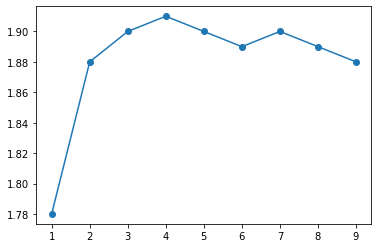

In [67]:
errors = []
for k in range(1,10):
    imputer = KNNImputer(n_neighbors=k, missing_values=np.nan)
    imputer.fit(sample_datas[listkNN])
    datas_test = imputer.transform(sample_datas[listkNN])
    df_test = pd.DataFrame(datas_test, columns=listkNN)
    df_test[listkNN] = df_test[listkNN].round(2)
    df_temp = df_kNN.loc[sample_datas.index].round(2)
    df_test['nb_erreur'] = 0
    for col in listkNN:
        strCol = col + '_true'
        value = df_temp[col].values
        df_test[strCol] = value
        for index, row in df_test.iterrows():
            if df_test.loc[index,col] != df_test.loc[index,strCol]:
                if 0 <= df_test.loc[index,col]-df_test.loc[index,strCol] > 10:
                    df_test.loc[index,'nb_erreur'] += 1
    tx_erreur = (df_test['nb_erreur'].sum()/(df_test.shape[0]*df_test.shape[1]))*100
    tx_erreur = tx_erreur.round(2)
    errors.append(tx_erreur)
    
plt.plot(range(1,10), errors, 'o-')
plt.show()

In [68]:
k = errors.index(min(errors))+1
print("La valeur optimal de k est : {} avec un taux d'erreur de {}%. Je vais donc imputer les valeurs manquantes des variables ({}) par l'algorithme des {}-NN.".format(k,min(errors),listkNN,k))

La valeur optimal de k est : 1 avec un taux d'erreur de 1.78%. Je vais donc imputer les valeurs manquantes des variables (['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']) par l'algorithme des 1-NN.


In [69]:
del df_kNN
del df_cleaned
del sample_datas
del errors
del imputer
del datas_test
del df_test
del df_temp
del strCol
del value
del tx_erreur

In [70]:
# On entraine le modèle d'imputation sur un échantillon de données
sample_datas = df_france[listkNN].sample(frac=0.25, random_state=10)
imputer = KNNImputer(n_neighbors=k, missing_values=np.nan)
imputer.fit(sample_datas)
KNNImputer()

# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(df_france[listkNN])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=listkNN)
del datas_imputed

# On exporte les valeurs trouvées dans le df
for col_knn in listkNN:
    df_france[col_knn] = df_datas_imputed[col_knn].values

J'affiche de nouveaux les distributions pour vérifier que rien n'a changé.

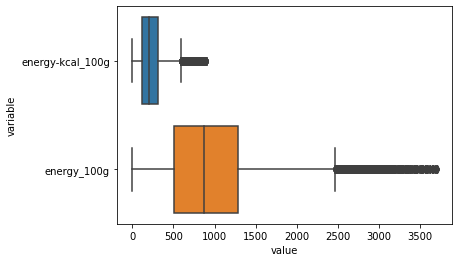

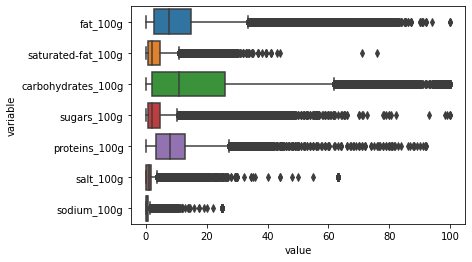

In [71]:
list1 = [x for x in listkNN if x.startswith("energy")]
sns.boxplot(x="value", y="variable", data = pd.melt(df_france[list1]), orient ='h')
plt.show();

list2 = [x for x in listkNN if x not in list1]
sns.boxplot(x="value", y="variable", data = pd.melt(df_france[list2]), orient ='h')
plt.show();

Les variables calories (en joules), graisses, sel et glucides, étaient utiles uniquement pour la partie nettoyage de données. Je vais maintenant les supprimer du jeu de données.

In [72]:
listCol = ['energy_100g', 'fat_100g', 'salt_100g','carbohydrates_100g']
df_france = df_france.drop(columns = listCol)

Enfin, je réaffiche les valeurs manquantes des variables.

In [73]:
df_france.isna().mean()

code                          0.00
created_datetime              0.00
last_modified_datetime        0.00
product_name                  0.00
other_countries               0.00
nutriscore_grade              0.09
nova_group                    0.00
pnns_groups_1                 0.00
pnns_groups_2                 0.00
image_small_url               0.05
energy-kcal_100g              0.00
saturated-fat_100g            0.00
sugars_100g                   0.00
fiber_100g                    0.00
proteins_100g                 0.00
sodium_100g                   0.00
fruits-vegetables-nuts_100g   0.00
nutriscore_100g               0.09
nova_desc                     0.00
dtype: float64

On a au final un jeu de données rempli à la quasi totalité.

Je modifie juste l'ordre des colonnes.

In [74]:
newOrderCol = [
                # informations générales
                'code', 'created_datetime', 'last_modified_datetime', 'product_name', 'image_small_url', 'other_countries'
                # catégorisation du produit
                , 'pnns_groups_1', 'pnns_groups_2', 'nova_group', 'nova_desc', 'nutriscore_100g', 'nutriscore_grade'
                # nutriments négatifs
                , 'energy-kcal_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g'
                # nutriments positifs
                , 'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g']
df_france = df_france.reindex(columns = newOrderCol)

Puis, j'exporte le jeu de données.

# Export du fichier nettoyée
Je vais maintenant exporter le jeu de données afin de pouvoir faire mes analyses dessus. Mais avant, je ne garde que les nutriments utiles pour le calcul du nutriscore.

In [75]:
# exporter le csv
df_france.to_csv("C:\\Users\\bland\\Downloads\\fr_openfoodfacts_org_products_clean.csv", index = False)

In [76]:
del df
del df_france